In [7]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
# import dataset
df = pd.read_csv('../UFC_train.csv')
df.head()

,R_fighter,B_fighter,Referee,date,location,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner
0,Joe Riggs,Joe Doerksen,Steve Mazzagatti,2004-08-21,"Las Vegas, Nevada, USA",False,Middleweight,NaN,NaN,NaN,...,0,0,0,Southpaw,182.88,177.80,185.0,26.0,21.0,Red
1,Jorge Masvidal,Al Iaquinta,Keith Peterson,2015-04-04,"Fairfax, Virginia, USA",False,Lightweight,1.156250,0.000000,0.394141,...,0,1,0,Orthodox,180.34,187.96,170.0,27.0,30.0,Blue
2,Dan Stittgen,Stephen Thompson,Josh Rosenthal,2012-02-04,"Las Vegas, Nevada, USA",False,Welterweight,NaN,NaN,NaN,...,0,0,0,Orthodox,185.42,NaN,170.0,28.0,31.0,Blue
3,Josh Koscheck,Johny Hendricks,Kevin Mulhall,2012-05-05,"East Rutherford, New Jersey, USA",False,Welterweight,0.695312,0.000000,0.783359,...,6,3,0,Orthodox,177.80,185.42,170.0,28.0,34.0,Blue
4,John Dodson,Manvel Gamburyan,James Warring,2016-04-16,"Tampa, Florida, USA",False,Bantamweight,0.500000,0.266602,0.381462,...,3,0,1,Orthodox,160.02,167.64,135.0,34.0,31.0,Red


In [9]:
# Drop null values
print("Before dropping null values: ", df.shape)
df = df.dropna()
print("After dropping null values: ", df.shape)

Before dropping null values:  (5410, 144)
After dropping null values:  (3480, 144)


In [10]:
features_to_keep = ["B_fighter", "B_avg_HEAD_landed", "B_avg_BODY_landed", "B_avg_LEG_landed", "B_avg_DISTANCE_landed", "B_avg_KD", "B_avg_SUB_ATT", "B_avg_REV", "B_avg_SIG_STR_landed", "B_avg_TOTAL_STR_landed", "B_avg_TD_landed", "B_avg_CLINCH_landed", "B_avg_GROUND_landed"]
features_to_keep += ["R_fighter", "R_avg_HEAD_landed", "R_avg_BODY_landed", "R_avg_LEG_landed", "R_avg_DISTANCE_landed", "R_avg_KD", "R_avg_SUB_ATT", "R_avg_REV", "R_avg_SIG_STR_landed", "R_avg_TOTAL_STR_landed", "R_avg_TD_landed", "R_avg_CLINCH_landed", "R_avg_GROUND_landed"]

df_cluster4 = df[features_to_keep]

df_cluster4.head()

,B_fighter,B_avg_HEAD_landed,B_avg_BODY_landed,B_avg_LEG_landed,B_avg_DISTANCE_landed,B_avg_KD,B_avg_SUB_ATT,B_avg_REV,B_avg_SIG_STR_landed,B_avg_TOTAL_STR_landed,...,R_avg_LEG_landed,R_avg_DISTANCE_landed,R_avg_KD,R_avg_SUB_ATT,R_avg_REV,R_avg_SIG_STR_landed,R_avg_TOTAL_STR_landed,R_avg_TD_landed,R_avg_CLINCH_landed,R_avg_GROUND_landed
1,Al Iaquinta,39.976562,7.765625,5.492188,46.812500,1.156250,0.15625,0.000,53.234375,56.718750,...,5.312500,41.562500,0.500000,0.562500,0.500000,60.562500,87.593750,1.875000,11.750000,7.250000
3,Johny Hendricks,11.804688,4.546875,2.664062,8.875000,0.695312,0.09375,0.000,19.015625,30.742188,...,0.155367,14.901989,0.020050,0.093866,0.000015,27.139767,41.379938,1.440809,7.393555,4.844223
4,Manvel Gamburyan,18.651855,5.452637,5.882080,20.501221,0.500000,1.37793,0.125,29.986572,51.280762,...,9.937500,33.382812,0.320312,0.000000,0.000000,44.851562,72.429688,1.171875,10.640625,0.828125
6,Katsunori Kikuno,16.000000,5.000000,2.000000,17.000000,0.000000,0.00000,0.000,23.000000,73.000000,...,6.625000,22.687500,0.062500,0.625000,0.000000,24.625000,26.250000,0.250000,1.125000,0.812500
7,Viscardi Andrade,25.500000,15.000000,7.500000,32.000000,0.500000,0.00000,0.000,48.000000,60.000000,...,14.500000,33.625000,0.250000,0.000000,0.000000,65.250000,100.625000,0.625000,12.625000,19.000000


In [11]:
df_cluster4 = df_cluster4.drop_duplicates(subset=['B_fighter', 'R_fighter'])

# B_fighter df
df_B_fighter = df_cluster4[["B_fighter", "B_avg_HEAD_landed", "B_avg_BODY_landed", "B_avg_LEG_landed", "B_avg_DISTANCE_landed", "B_avg_KD", "B_avg_SUB_ATT", "B_avg_REV", "B_avg_SIG_STR_landed", "B_avg_TOTAL_STR_landed", "B_avg_TD_landed", "B_avg_CLINCH_landed", "B_avg_GROUND_landed"]]

# Rename all columns to remove the 'B_' prefix
df_B_fighter.columns = df_B_fighter.columns.str.replace('B_', '')

# R_fighter df
df_R_fighter = df_cluster4[["R_fighter", "R_avg_HEAD_landed", "R_avg_BODY_landed", "R_avg_LEG_landed", "R_avg_DISTANCE_landed", "R_avg_KD", "R_avg_SUB_ATT", "R_avg_REV", "R_avg_SIG_STR_landed", "R_avg_TOTAL_STR_landed", "R_avg_TD_landed", "R_avg_CLINCH_landed", "R_avg_GROUND_landed"]]

# Rename all columns to remove the 'R_' prefix
df_R_fighter.columns = df_R_fighter.columns.str.replace('R_', '')

# Combine the two DFs
df_fighter = pd.concat([df_B_fighter, df_R_fighter])

df_fighter.head()


,fighter,avg_HEAD_landed,avg_BODY_landed,avg_LEG_landed,avg_DISTANCE_landed,avg_KD,avg_SUATT,avg_REV,avg_SIG_STR_landed,avg_TOTAL_STR_landed,avg_TD_landed,avg_CLINCH_landed,avg_GROUND_landed,avg_SUB_ATT,avg_SIG_STlanded,avg_TOTAL_STlanded
1,Al Iaquinta,39.976562,7.765625,5.492188,46.812500,1.156250,0.15625,0.000,53.234375,56.718750,0.625000,3.679688,2.742188,NaN,NaN,NaN
3,Johny Hendricks,11.804688,4.546875,2.664062,8.875000,0.695312,0.09375,0.000,19.015625,30.742188,0.804688,8.617188,1.523438,NaN,NaN,NaN
4,Manvel Gamburyan,18.651855,5.452637,5.882080,20.501221,0.500000,1.37793,0.125,29.986572,51.280762,3.588867,6.316650,3.168701,NaN,NaN,NaN
6,Katsunori Kikuno,16.000000,5.000000,2.000000,17.000000,0.000000,0.00000,0.000,23.000000,73.000000,3.000000,3.000000,3.000000,NaN,NaN,NaN
7,Viscardi Andrade,25.500000,15.000000,7.500000,32.000000,0.500000,0.00000,0.000,48.000000,60.000000,0.250000,12.250000,3.750000,NaN,NaN,NaN


In [6]:
df_fighter.shape

(6854, 16)

In [12]:
# Drop last 3 columns
df_fighter = df_fighter.drop(columns=["avg_SUB_ATT",	"avg_SIG_STlanded",	"avg_TOTAL_STlanded"])

df_fighter.head()

,fighter,avg_HEAD_landed,avg_BODY_landed,avg_LEG_landed,avg_DISTANCE_landed,avg_KD,avg_SUATT,avg_REV,avg_SIG_STR_landed,avg_TOTAL_STR_landed,avg_TD_landed,avg_CLINCH_landed,avg_GROUND_landed
1,Al Iaquinta,39.976562,7.765625,5.492188,46.812500,1.156250,0.15625,0.000,53.234375,56.718750,0.625000,3.679688,2.742188
3,Johny Hendricks,11.804688,4.546875,2.664062,8.875000,0.695312,0.09375,0.000,19.015625,30.742188,0.804688,8.617188,1.523438
4,Manvel Gamburyan,18.651855,5.452637,5.882080,20.501221,0.500000,1.37793,0.125,29.986572,51.280762,3.588867,6.316650,3.168701
6,Katsunori Kikuno,16.000000,5.000000,2.000000,17.000000,0.000000,0.00000,0.000,23.000000,73.000000,3.000000,3.000000,3.000000
7,Viscardi Andrade,25.500000,15.000000,7.500000,32.000000,0.500000,0.00000,0.000,48.000000,60.000000,0.250000,12.250000,3.750000


In [14]:
df_fighter.shape

(6854, 13)

In [16]:
df_fighter.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_HEAD_landed,6854.0,23.323504,15.664430,0.0,12.230879,20.062500,30.717773,173.163765
avg_BODY_landed,6854.0,7.208378,6.060575,0.0,3.000000,5.750000,9.869426,64.000000
avg_LEG_landed,6854.0,5.731796,5.780515,0.0,1.742554,4.000000,7.991211,62.351562
avg_DISTANCE_landed,6854.0,24.717909,20.056627,0.0,10.019310,19.713379,34.500000,192.648659
avg_KD,6854.0,0.260184,0.374188,0.0,0.000000,0.062500,0.500000,5.000000
avg_SUATT,3427.0,0.476033,0.711480,0.0,0.000000,0.187500,0.710938,8.000000
avg_REV,6854.0,0.145353,0.310318,0.0,0.000000,0.000000,0.125000,3.000000
avg_SIG_STR_landed,3427.0,35.520324,21.973856,0.0,19.250000,31.925819,48.039795,186.000000
avg_TOTAL_STR_landed,3427.0,54.592655,31.169829,0.0,31.968750,50.437500,72.195312,242.000000
avg_TD_landed,6854.0,1.183890,1.329623,0.0,0.187500,0.804688,1.697510,11.000000


In [17]:
print("Shape before dropping duplicates: ", df_fighter.shape)
df_fighter.drop_duplicates(subset=['fighter'], inplace=True)
print("Shape after dropping duplicates: ", df_fighter.shape)

Shape before dropping duplicates:  (6854, 13)
Shape after dropping duplicates:  (1313, 13)


In [19]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [20]:
outliers = dict(check_outlier(df_fighter[1:]).sum())
print("\n\npercentage of outliers in each column:")
for key in outliers.keys():
    print(f"{key} = {outliers[key]/df_fighter[1:][key].shape[0] * 100}%")

Outlier pada tiap atribut:
avg_BODY_landed          59
avg_CLINCH_landed        72
avg_DISTANCE_landed      42
avg_GROUND_landed        92
avg_HEAD_landed          33
avg_KD                  120
avg_LEG_landed           63
avg_REV                 233
avg_SIG_STR_landed       21
avg_SUATT                73
avg_TD_landed            51
avg_TOTAL_STR_landed     31
fighter                   0
dtype: int64


percentage of outliers in each column:
avg_BODY_landed = 4.496951219512195%
avg_CLINCH_landed = 5.487804878048781%
avg_DISTANCE_landed = 3.201219512195122%
avg_GROUND_landed = 7.01219512195122%
avg_HEAD_landed = 2.5152439024390247%
avg_KD = 9.146341463414634%
avg_LEG_landed = 4.801829268292683%
avg_REV = 17.759146341463413%
avg_SIG_STR_landed = 1.600609756097561%
avg_SUATT = 5.564024390243903%
avg_TD_landed = 3.8871951219512195%
avg_TOTAL_STR_landed = 2.3628048780487805%
fighter = 0.0%


/var/folders/53/kv053qr13vxg2_y_1lg6hjg80000gn/T/ipykernel_35865/3859787923.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


In [27]:
df_fighter.head()

,fighter,avg_HEAD_landed,avg_BODY_landed,avg_LEG_landed,avg_DISTANCE_landed,avg_KD,avg_SUATT,avg_REV,avg_SIG_STR_landed,avg_TOTAL_STR_landed,avg_TD_landed,avg_CLINCH_landed,avg_GROUND_landed
1,Al Iaquinta,39.976562,7.765625,5.492188,46.812500,1.156250,0.15625,0.000,53.234375,56.718750,0.625000,3.679688,2.742188
3,Johny Hendricks,11.804688,4.546875,2.664062,8.875000,0.695312,0.09375,0.000,19.015625,30.742188,0.804688,8.617188,1.523438
4,Manvel Gamburyan,18.651855,5.452637,5.882080,20.501221,0.500000,1.37793,0.125,29.986572,51.280762,3.588867,6.316650,3.168701
6,Katsunori Kikuno,16.000000,5.000000,2.000000,17.000000,0.000000,0.00000,0.000,23.000000,73.000000,3.000000,3.000000,3.000000
7,Viscardi Andrade,25.500000,15.000000,7.500000,32.000000,0.500000,0.00000,0.000,48.000000,60.000000,0.250000,12.250000,3.750000


In [28]:
# Drop duplicates
df_fighter.drop_duplicates(subset=['fighter'], inplace=True)

In [29]:
# Reindex
df_fighter.reset_index(drop=True, inplace=True)

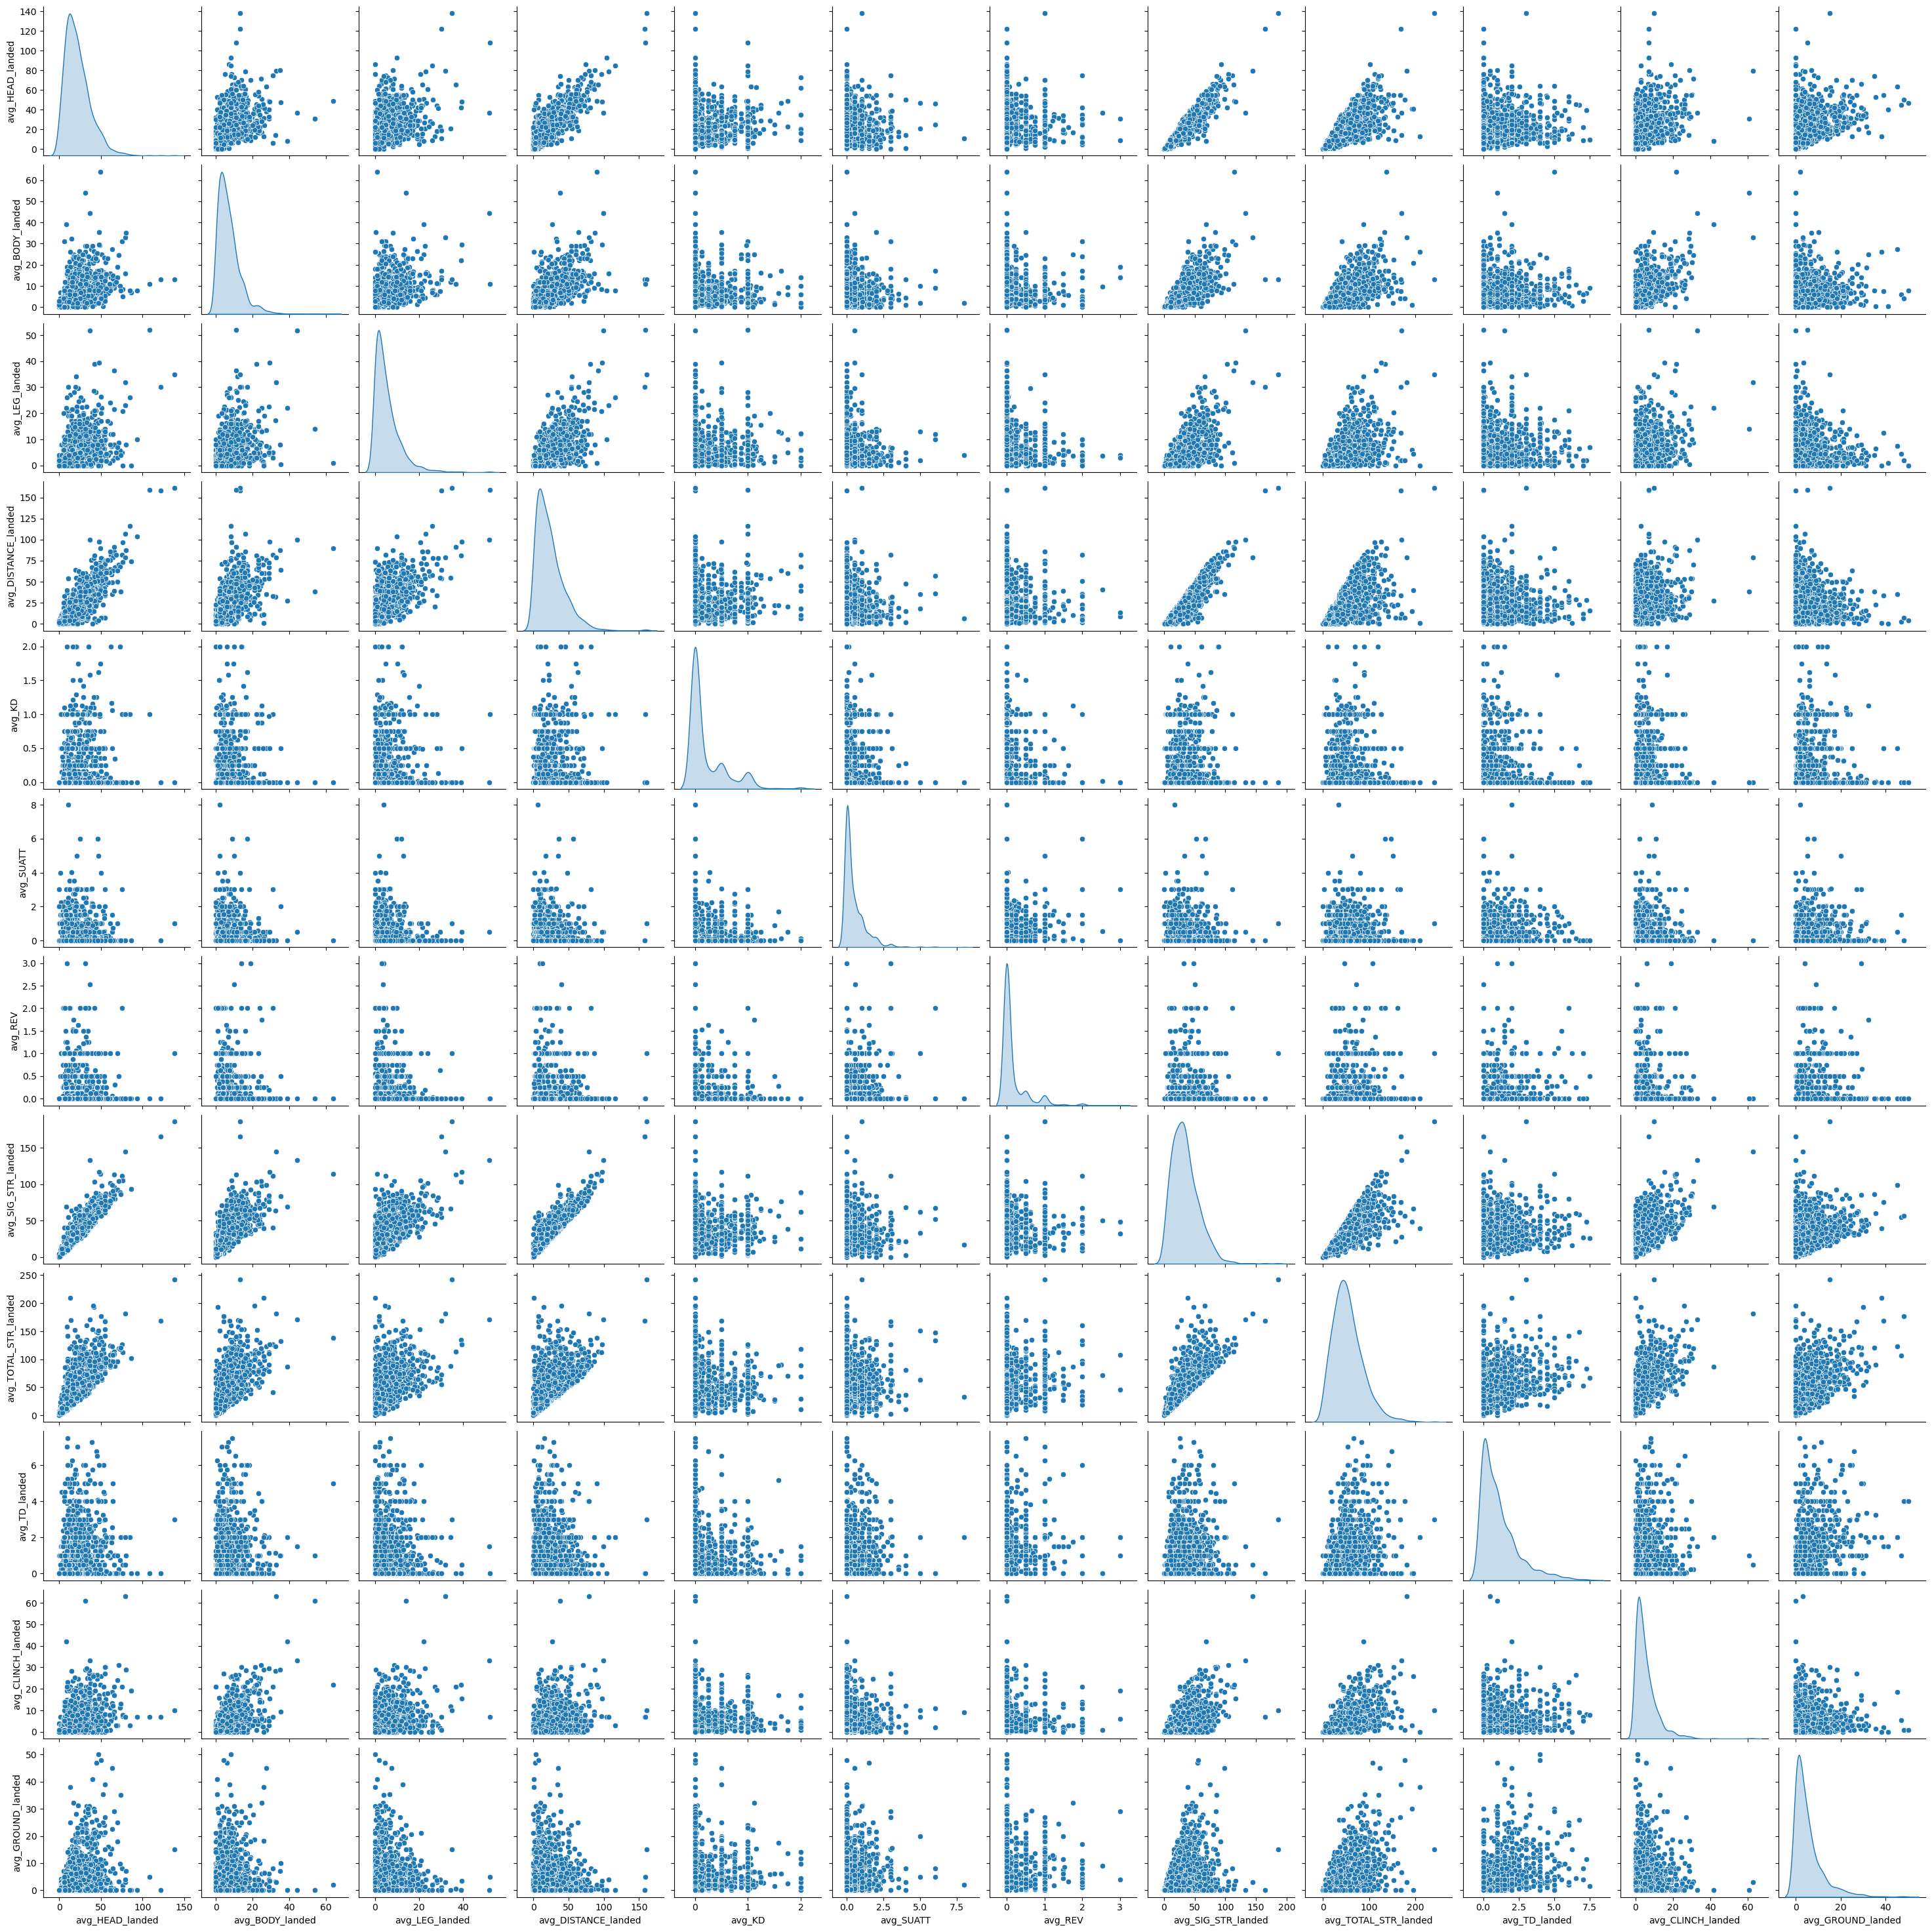

In [30]:
#Pairplot
sns.pairplot(df_fighter, diag_kind='kde')
plt.show()

In [31]:
# Standardize features
scaler = StandardScaler()
df_fighter_scaled = df_fighter.drop(columns=['fighter'])
df_fighter_scaled = scaler.fit_transform(df_fighter_scaled)

# Combine with fighter column
df_fighter_scaled = pd.DataFrame(df_fighter_scaled, columns=df_fighter.drop(columns=['fighter']).columns)


In [32]:
df_fighter_scaled.head()

,avg_HEAD_landed,avg_BODY_landed,avg_LEG_landed,avg_DISTANCE_landed,avg_KD,avg_SUATT,avg_REV,avg_SIG_STR_landed,avg_TOTAL_STR_landed,avg_TD_landed,avg_CLINCH_landed,avg_GROUND_landed
0,1.139690,0.114725,-0.000006,1.164538,2.546747,-0.429466,-0.455569,0.849624,0.085482,-0.379233,-0.304981,-0.404379
1,-0.655480,-0.395035,-0.475919,-0.745993,1.288208,-0.511165,-0.455569,-0.702177,-0.704105,-0.242665,0.516984,-0.588097
2,-0.219164,-0.251588,0.065605,-0.160497,0.754928,1.167498,-0.122560,-0.204651,-0.079812,1.873402,0.134004,-0.340085
3,-0.388146,-0.323273,-0.587666,-0.336818,-0.610267,-0.633714,-0.455569,-0.521488,0.580368,1.425844,-0.418132,-0.365516
4,0.217214,1.260448,0.337866,0.418581,0.754928,-0.633714,-0.455569,0.612248,0.185219,-0.664245,1.121752,-0.252459


In [34]:
df_fighter_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_HEAD_landed,1313.0,9.436473e-17,1.000381,-1.407700,-0.706757,-0.196980,0.503963,7.385949
avg_BODY_landed,1313.0,-6.756041e-17,1.000381,-1.115133,-0.679610,-0.244087,0.399300,9.020679
avg_LEG_landed,1313.0,2.130816e-17,1.000381,-0.924223,-0.671805,-0.254108,0.337866,7.826263
avg_DISTANCE_landed,1313.0,1.557103e-16,1.000381,-1.192938,-0.739698,-0.226459,0.465302,6.915016
avg_KD,1313.0,-6.223337e-17,1.000381,-0.610267,-0.610267,-0.610267,0.413629,4.850515
avg_SUATT,1184.0,1.837869e-17,1.000423,-0.633714,-0.633714,-0.470316,0.346676,9.823783
avg_REV,1313.0,-2.641113e-16,1.000381,-0.455569,-0.455569,-0.455569,-0.122560,7.536640
avg_SIG_STR_landed,1184.0,-1.500301e-17,1.000423,-1.564525,-0.747083,-0.136017,0.521549,6.870470
avg_TOTAL_STR_landed,1184.0,3.446005e-18,1.000423,-1.638547,-0.692706,-0.137383,0.523376,5.717310
avg_TD_landed,1313.0,-6.954748e-17,1.000381,-0.854253,-0.854253,-0.284229,0.395644,4.845990


In [36]:
# Drop null
print("Before dropping null values: ", df_fighter_scaled.shape)
df_fighter_scaled = df_fighter_scaled.dropna()
print("After dropping null values: ", df_fighter_scaled.shape)

Before dropping null values:  (1313, 12)
After dropping null values:  (1184, 12)


Karena pada data terdapat banyak outliers, gunakan DBSCAN

In [62]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(df_fighter_scaled)
distances, indices = neighbors_fit.kneighbors(df_fighter_scaled)


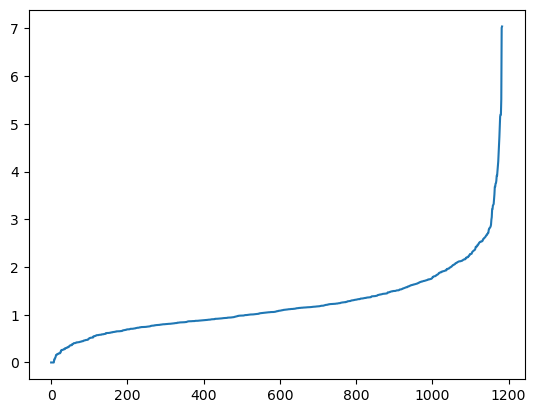

In [63]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [70]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=3,min_samples=4)

db.fit(df_fighter_scaled)

DBSCAN(eps=3, min_samples=4)

In [71]:
label=db.labels_
label

array([ 0,  0,  0, ...,  0, -1,  0])

In [72]:
# Unique label
unique_label=np.unique(label)
unique_label

array([-1,  0])

In [73]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


In [74]:
# PCA to 3 components
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(df_fighter_scaled)
pca_features = pca.transform(df_fighter_scaled)

In [75]:
pca_features.shape

(1184, 3)

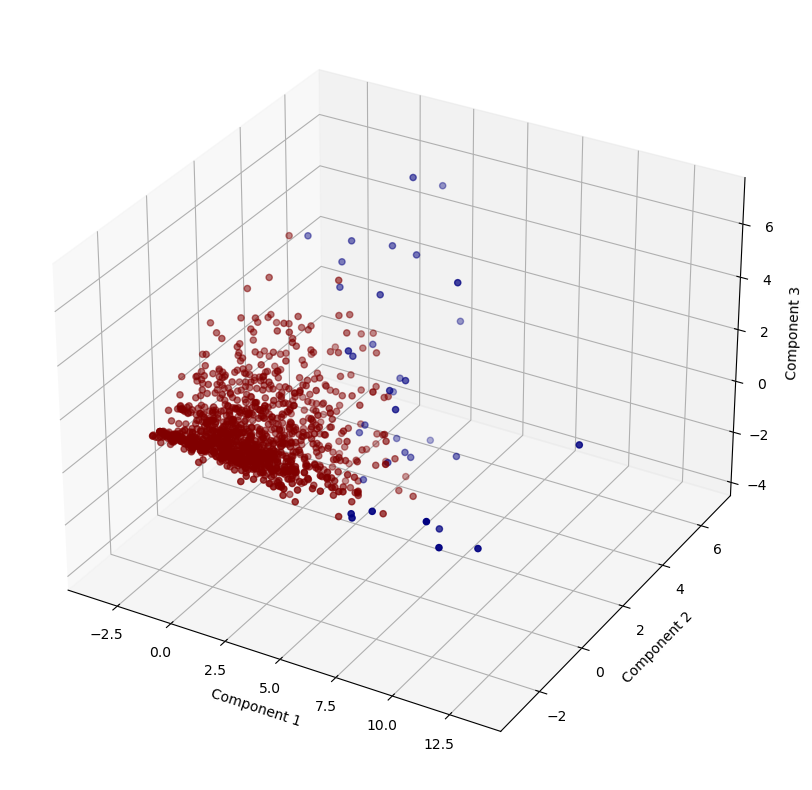

In [76]:
# Plot the 3 components
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_features[:,0], pca_features[:,1], pca_features[:,2], c=label, cmap='jet')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()